In [1]:
from coronavirus_analyzer import CoronavirusAnalyzer
from sklearn import preprocessing
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
first_date = '2020-01-17'
last_date = '2020-02-29'
sample_cnt = 0
in_english = False
analyzer = CoronavirusAnalyzer(last_date, first_date=first_date, sample_cnt=sample_cnt, in_english=in_english)

2020-03-01 23:23:59,239 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


In [3]:
df_move_in_risk = analyzer.df_move_in_risk
if in_english:
    del df_move_in_risk['Hubei']
    del df_move_in_risk['Wuhan']
else:
    del df_move_in_risk['湖北']
    del df_move_in_risk['武汉']
s_to_home = df_move_in_risk.loc[:'2020-01-24'].mean().sort_values(ascending=False)
s_to_work = df_move_in_risk.loc['2020-01-25':].mean().sort_values(ascending=False)
s_home_work = s_to_home / s_to_work
s_to_home.name = 'to_home'
s_to_work.name = 'to_work'
s_home_work.name = 'home work rate'
df_risk = pd.DataFrame([s_to_home, s_to_work, s_home_work]).T.sort_values(
    by='home work rate', ascending=True)
df_risk.T

,上海,广东,北京,天津,青海,西藏,山西,浙江,宁夏,重庆,江苏,新疆,陕西,湖南,辽宁,内蒙古,吉林,云南,福建,甘肃,河南,贵州,山东,四川,安徽,黑龙江,河北,海南,江西,温州,广西
to_home,40.846830,127.243324,35.220815,14.577452,2.292572,0.832852,40.931651,78.350122,3.635991,152.656682,150.791951,5.978712,73.478337,386.767202,26.313198,15.965121,16.361466,47.297585,78.975903,23.364705,342.230423,71.498353,92.614114,175.668791,222.287836,21.602895,128.935585,26.756267,229.202424,27.002664,216.701412
to_work,308.735046,903.706756,199.056875,64.344829,8.638402,2.693422,109.088404,198.401721,8.391354,330.100330,315.366762,12.307823,136.198650,643.573772,42.737671,24.497280,24.616530,61.478150,100.914764,28.554704,415.336858,85.378001,101.936213,192.633122,205.799443,18.993977,105.556509,21.076463,176.657858,20.611635,114.406669
home work rate,0.132304,0.140802,0.176938,0.226552,0.265393,0.309217,0.375215,0.394906,0.433302,0.462455,0.478148,0.485765,0.539494,0.600968,0.615691,0.651710,0.664654,0.769340,0.782600,0.818244,0.823983,0.837433,0.908550,0.911935,1.080119,1.137355,1.221484,1.269486,1.297437,1.310069,1.894133


In [4]:
df_curve_in = analyzer.df_curve_in
if in_english:
    del df_curve_in['Hubei']
    del df_curve_in['Wuhan']
else:
    del df_curve_in['湖北']
    del df_curve_in['武汉']
s_to_home = df_curve_in.loc[:'2020-01-24'].mean().sort_values(ascending=False)
s_to_home.name = 'to_home'
s_to_work = df_curve_in.loc['2020-01-25':].mean().sort_values(ascending=False)
s_to_work.name = 'to_work'
s_home_work = s_to_home / s_to_work
s_home_work.name = 'home work rate'
df_move = pd.DataFrame([s_to_home, s_to_work, s_home_work]).T.sort_values(
    by='home work rate', ascending=True)
df_move.T

,广东,上海,浙江,西藏,北京,青海,天津,江苏,宁夏,辽宁,内蒙古,新疆,云南,福建,贵州,吉林,山西,陕西,温州,重庆,山东,甘肃,河北,四川,海南,黑龙江,广西,湖南,河南,安徽,江西
to_home,8.068293,4.858080,6.867504,0.121131,6.429480,0.481055,2.724674,13.643275,0.906463,3.978769,3.251300,0.591588,4.818629,5.259573,7.573281,2.986944,5.010198,6.021913,2.061191,8.637022,10.811876,3.824140,14.940175,14.996668,1.921559,3.646288,14.069007,17.746691,20.601540,22.894443,15.171235
to_work,10.187819,3.377756,4.607760,0.065350,3.287568,0.224245,1.218819,4.674086,0.272892,1.162808,0.934867,0.161365,1.284573,1.388215,1.635258,0.636750,1.052645,1.234262,0.421704,1.729659,1.880099,0.664862,2.437992,2.219805,0.278380,0.512581,1.432329,1.680578,1.867273,1.955853,1.144030
home work rate,0.791955,1.438257,1.490421,1.853583,1.955695,2.145221,2.235504,2.918918,3.321695,3.421690,3.477821,3.666134,3.751153,3.788731,4.631246,4.690921,4.759630,4.878959,4.887767,4.993483,5.750695,5.751784,6.128065,6.755849,6.902650,7.113589,9.822467,10.559873,11.032954,11.705605,13.261216


In [2]:
from util.util import Util
first_date = '2020-01-17'
last_date = '2020-02-28'
sample_cnt = 0
in_english = False
analyzer = CoronavirusAnalyzer(last_date, first_date=first_date, sample_cnt=sample_cnt, in_english=in_english)

df_move_inc_corr = analyzer.df_move_inc_corr
df_move_in_risk = analyzer.df_move_in_risk
df_curve_in = analyzer.df_curve_in.loc[first_date: last_date]
df_virus_daily_inc_injured = analyzer.df_virus_daily_inc_injured
# 
if in_english:
    del df_curve_in['Hubei']
    del df_curve_in['Wuhan']
else:
    del df_curve_in['湖北']
    del df_curve_in['武汉']
s_to_home = df_curve_in.loc[:'2020-01-24'].mean().sort_values(ascending=False)
s_to_home.name = 'to_home'
s_to_work = df_curve_in.loc['2020-01-25':].mean().sort_values(ascending=False)
s_to_work.name = 'to_work'
s_home_work = s_to_home / s_to_work
s_home_work.name = 'home work rate'
df_move = pd.DataFrame([s_to_home, s_to_work, s_home_work]).T.sort_values(
    by='home work rate', ascending=True)


# 山东省 2020-02-20 日新增的 202 是监狱中累计的人数，并非一天的人数，需要去掉
region = 'Shandong' if in_english else '山东'
df_virus_daily_inc_injured.loc['2020-02-20', region] = 0
if in_english:
    del df_virus_daily_inc_injured['Hubei']
else:
    del df_virus_daily_inc_injured['湖北']

dfs_risk_new = []
for df_data, col_name in zip([df_curve_in, df_move_in_risk, df_virus_daily_inc_injured], ['move', 'risk', 'new']):
    s_max_val = df_data.max()
    s_half_val = s_max_val / 2.0
    top_dates = {}
    half_dates = {}
    corrs = {}
    offsets = {}
    windows = {}
    index = df_data.index.tolist()
    for region in df_data.columns:
        if region in ['武汉', 'Wuhan', '温州', 'Wenzhou', '湖北', 'Hubei']:
            continue
        top_date = None
        max_val = s_max_val[region]
        for date in index:
            val = df_data.loc[date, region]
            if val == max_val:
                top_date = date
                break
        assert top_date is not None
        top_dates[region] = top_date
        half_val = s_half_val[region]
        for row_idx in range(len(index))[::-1]:
            last_val = df_data[region].values[row_idx-1]
            this_val = df_data[region].values[row_idx]
            if last_val > half_val and this_val <= half_val:
                half_date = index[row_idx]
                half_dates[region] = half_date
                s_corr = df_move_inc_corr.loc[half_date, region]
                corrs[region] = s_corr['corr']
                offsets[region] = s_corr['shift']
                windows[region] = s_corr['window']
                break

    s_top_date = pd.Series(top_dates)
    s_half_date = pd.Series(half_dates)
    s_top_date.values[:] = Util.str_dates_to_dates(s_top_date)
    s_half_date.values[:] = Util.str_dates_to_dates(s_half_date)
    s_turn_half_day_cnt = (s_half_date - s_top_date) / 86400 / 1e9
    s_corr = pd.Series(corrs)
    s_offset = pd.Series(offsets)
    s_window = pd.Series(windows)

    s_max_val.name = 'top value'
    s_top_date.name = 'top date'
    s_half_date.name = 'half date'
    s_half_val.name = 'half value'
    s_turn_half_day_cnt.name = 'turn half day cnt'
    s_corr.name = 'half date corr'
    s_offset.name = 'half date offset'
    s_window.name = 'half date window'

    df = pd.DataFrame([s_top_date, s_max_val, s_half_date, s_turn_half_day_cnt, s_corr, 
                       s_offset, s_window]).T.sort_values(by='half date', ascending=True)
    for col, new_col in zip(['top date', 'half date'], ['top date idx', 'half date idx']):
        df[new_col] = [index.index(str(date)) if isinstance(date, datetime.date) else 0 for date in df[col]]
        dates = ['-'.join(str(date).split('-')[1:]) for date in df[col]]
        df[col].values[:] = dates
    df.columns = pd.MultiIndex.from_product([[col_name], df.columns])
    dfs_risk_new.append(df)

df_diagnosed = analyzer.df_virus_daily_injured.iloc[[-1]]
if in_english:
    del df_diagnosed['Hubei']
else:
    del df_diagnosed['湖北']
df_diagnosed = df_diagnosed.T
df_diagnosed.columns = pd.MultiIndex.from_product([[''], ['diagnosed']])
df_diagnosed = df_diagnosed.sort_values(by=('', 'diagnosed'), ascending=False)
df_home_work = df_move[['home work rate']]
df_home_work = df_home_work.sort_values(by=df_home_work.columns[0], ascending=True)
df_home_work.columns = pd.MultiIndex.from_product([[''], df_home_work.columns])

min_max_scaler = preprocessing.MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(df_diagnosed)
df_diagnosed_normalized = pd.DataFrame(X_min_max, index=df_diagnosed.index, columns=df_diagnosed.columns)
df_diagnosed_normalized.columns = pd.MultiIndex.from_product([[''], ['normalized diagnosed']])
X_min_max = min_max_scaler.fit_transform(df_home_work)
df_home_work_normalized = pd.DataFrame(X_min_max, index=df_home_work.index, columns=df_home_work.columns)
df_home_work_normalized.columns = pd.MultiIndex.from_product([[''], ['normalized home work rate']])

# df_risk_new = pd.concat([df_diagnosed, df_home_work] + dfs_risk_new, axis=1, sort=False)
df_risk_new = pd.concat([df_home_work, df_home_work_normalized, df_diagnosed, df_diagnosed_normalized] + dfs_risk_new, axis=1, sort=False)
df_risk_new = df_risk_new.dropna(how='any', axis=0)
df_risk_new[('move', 'top date idx')] = df_risk_new[('move', 'top date idx')].astype(np.int32)
df_risk_new[('move', 'half date idx')] = df_risk_new[('move', 'half date idx')].astype(np.int32)
df_risk_new[('new', 'top date idx')] = df_risk_new[('new', 'top date idx')].astype(np.int32)
df_risk_new[('new', 'half date idx')] = df_risk_new[('new', 'half date idx')].astype(np.int32)
df_risk_new[('', 'diagnosed')] = df_risk_new[('', 'diagnosed')].astype(np.int32)
# df_risk_new[[('risk', 'turn half day cnt'), ('new', 'turn half day cnt')]]
order_types = {}
for region in df_risk_new.index:
    risk_top_date = df_risk_new.loc[region, ('risk', 'top date')]
    new_top_date = df_risk_new.loc[region, ('new', 'top date')]
    new_half_date = df_risk_new.loc[region, ('new', 'half date')]
    risk_half_date = df_risk_new.loc[region, ('risk', 'half date')]
    if risk_top_date <= new_top_date <= risk_half_date <= new_half_date:
        order_types[region] = 1
    elif risk_top_date <= new_top_date <= new_half_date <= risk_half_date:
        order_types[region] = 2
    elif risk_top_date <= risk_half_date <= new_top_date <= new_half_date:
        order_types[region] = 3
    elif new_top_date <= risk_top_date <= risk_half_date <= new_half_date:
        order_types[region] = 4
    elif new_top_date <= risk_top_date <= new_half_date <= risk_half_date:
        order_types[region] = 5
    elif new_top_date <= new_half_date <= risk_top_date <= risk_half_date:
        order_types[region] = 6
df_risk_new['', 'ordered'] = pd.Series(order_types)
df = df_risk_new[[('', 'diagnosed'), ('', 'home work rate'), ('', 'normalized home work rate'),
#              ('', 'ordered'),  
#              ('risk', 'turn half day cnt'), ('risk', 'top date'), ('risk', 'half date'), 
#              ('move', 'top date idx'), ('move', 'half date idx'),
#              ('move', 'half date offset'), ('move', 'half date window'),
#              ('risk', 'top date idx'), ('risk', 'half date idx'),
#              ('risk', 'half date corr'), 
#              ('risk', 'half date offset'), ('risk', 'half date window'),
#              ('new', 'turn half day cnt'), ('new', 'top date'), ('new', 'half date'), 
             ('new', 'top date idx'), ('new', 'half date idx'),
#              ('new', 'half date corr'), 
             ('new', 'half date offset'), ('new', 'half date window'),
            ]]
# df = df[df[('', 'diagnosed')] >= 200]
df

2020-03-01 23:24:45,969 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


new  \
    diagnosed home work rate normalized home work rate top date idx   
广东       1349       0.807929                  0.000000           14   
上海        337       1.436894                  0.049412           13   
浙江       1205       1.562564                  0.059285           12   
西藏          1       1.895415                  0.085435           12   
北京        410       1.933649                  0.088438           16   
青海         18       2.171885                  0.107154           16   
天津        136       2.248169                  0.113148           17   
江苏        631       2.978755                  0.170544           13   
宁夏         73       3.354012                  0.200024           19   
辽宁        121       3.416752                  0.204953           14   
内蒙古        75       3.520035                  0.213067           16   
新疆         76       3.625156                  0.221326           24   
云南        174       3.811049                  0.235930           11   
福建        296       3.878500                  0.241229            9   
吉林         93       4.659807                  0.302610           18   
贵州        146       4.689582                  0.304949           14   
山西        133       4.806464                  0.314131           22   
陕西        245       4.982756                  0.327981           13   
重庆        576       5.000108                  0.329344           13   
甘肃         91       5.817716                  0.393577           16   
山东        756       5.824081                  0.394077           19   
河北        318       6.187091                  0.422595           21   
四川        538       6.768609                  0.468280           13   
海南        168       6.948865                  0.482442           26   
黑龙江       480       7.020646                  0.488081           20   
广西        252       9.993452                  0.721629           12   
湖南       1018      10.693472                  0.776624           11   
河南       1272      11.142428                  0.811894           17   
安徽        990      11.861857                  0.868414           20   
江西        935      13.536801                  1.000000           17   

                                                     
    half date idx half date offset half date window  
广东             21                1                5  
上海             21                0                3  
浙江             18                1                2  
西藏             13                5                1  
北京             22                1                3  
青海             17                6                1  
天津             28                6                2  
江苏             28                0                9  
宁夏             27                0               10  
辽宁             20                1                1  
内蒙古            28                0               10  
新疆             31                4               10  
云南             15                1                2  
福建             22                0                3  
吉林             23                6                1  
贵州             26                4               10  
山西             23                1               10  
陕西             23                0                6  
重庆             24                3                2  
甘肃             23                6                1  
山东             25                0               10  
河北             28                3               10  
四川             26                1                7  
海南             27                1               10  
黑龙江            25                4               10  
广西             24                1                9  
湖南             24                7                1  
河南             22                3               10  
安徽             24                3               10  
江西             21                4               10

traffic control date idx = 9

control effect days = 5

control level = w1 * half date offset + w2 * (half date window - 1)  (search range: 0.0 < w1, w2 < 1.0)

max home work rate = 15.189610  (Jiangxi)

normalized home work rate = home work rate / max home work rate

shift days = days * (normalized home work rate - base home work rate)  (search range: 1 <= days <= 20, 0.0 <= base home work rate <= 1.0)

adjust days is the day count to adjust the final predict average error to 0. (search range: -2.0 <= adjust days <= 2.0)

half new date idx = traffic control date idx + control effect days * control level - shift days + adjust days

In [23]:
def search_parameters(region_min_diagnosed_cnt, min_w1=0.0, max_w1=0.5, min_w2=0.0, max_w2=0.5, 
                      min_days=1, max_days=20, min_base_home_work_rate=1.0):
    df = df_risk_new[df_risk_new[('', 'diagnosed')] >= region_min_diagnosed_cnt]
    print('region count: {}'.format(df.shape[0]))
    min_mean_delta = 10
    for _w1 in range(int(10 * min_w1), int(10 * (max_w1 + 0.1))):
        w1 = _w1 / 10.0
        for _w2 in range(int(10 * min_w2), int(10 * (max_w2 + 0.1))):
            w2 = _w2 / 10.0
            for control_effect_days in range(1, 21):
                for days in range(min_days, max_days + 1):
                    for _base_home_work_rate in range(int(10 * min_base_home_work_rate), 11):
                        base_home_work_rate = _base_home_work_rate / 10.0
                        for _adjust_days in range(-30, 31):
                            adjust_days = _adjust_days / 10.0
                            idx_delta = []
                            for region in df.index:
                                normalized_home_work_rate = df.loc[region, ('', 'normalized home work rate')]
                                offset = df.loc[region, ('new', 'half date offset')]
                                window = df.loc[region, ('new', 'half date window')]
                                real_idx = df.loc[region, ('new', 'half date idx')]
                                predict_idx = 9 + control_effect_days * (w1 * offset + w2 * (window - 1)) - days * \
                                              (normalized_home_work_rate - base_home_work_rate) + adjust_days
                                predict_idx = round(predict_idx)
                                idx_delta.append(real_idx - predict_idx)
                            idx_delta = np.array(idx_delta)
                            mean_delta = abs(idx_delta).mean()
                            if min_mean_delta >= mean_delta:
                                min_mean_delta = mean_delta
                                print('mean delta = {}; w1 = {}; w2 = {}; control_effect_days = {}; '
                                      'days = {}; base_home_work_rate = {}; adjust_days = {}'
                                      .format(mean_delta, w1, w2, control_effect_days, days, 
                                              base_home_work_rate, adjust_days))
    print('finish')

In [25]:
search_parameters(300)

region count: 14
mean delta = 9.928571428571429; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 3; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 9.857142857142858; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 3; base_home_work_rate = 1.0; adjust_days = 2.9
mean delta = 9.642857142857142; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 3; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 9.642857142857142; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 4; base_home_work_rate = 1.0; adjust_days = 2.5
mean delta = 9.642857142857142; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 4; base_home_work_rate = 1.0; adjust_days = 2.6
mean delta = 9.5; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 4; base_home_work_rate = 1.0; adjust_days = 2.7
mean delta = 9.357142857142858; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 4; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 9.214285714285714; w1 = 0.0; w2 = 0.0; control_effect_days =

mean delta = 6.0; w1 = 0.0; w2 = 0.0; control_effect_days = 5; days = 19; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 6.0; w1 = 0.0; w2 = 0.0; control_effect_days = 6; days = 19; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 6.0; w1 = 0.0; w2 = 0.0; control_effect_days = 7; days = 19; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 6.0; w1 = 0.0; w2 = 0.0; control_effect_days = 8; days = 19; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 6.0; w1 = 0.0; w2 = 0.0; control_effect_days = 9; days = 19; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 6.0; w1 = 0.0; w2 = 0.0; control_effect_days = 10; days = 19; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 6.0; w1 = 0.0; w2 = 0.0; control_effect_days = 11; days = 19; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 6.0; w1 = 0.0; w2 = 0.0; control_effect_days = 12; days = 19; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 6.0; w1 = 0.0; w2 = 0.0; control

mean delta = 4.357142857142857; w1 = 0.0; w2 = 0.1; control_effect_days = 4; days = 16; base_home_work_rate = 1.0; adjust_days = 2.9
mean delta = 4.285714285714286; w1 = 0.0; w2 = 0.1; control_effect_days = 4; days = 16; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 4.285714285714286; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 10; base_home_work_rate = 1.0; adjust_days = 2.4
mean delta = 4.285714285714286; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 10; base_home_work_rate = 1.0; adjust_days = 2.9
mean delta = 4.285714285714286; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 10; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 4.285714285714286; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 11; base_home_work_rate = 1.0; adjust_days = 2.4
mean delta = 4.214285714285714; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 11; base_home_work_rate = 1.0; adjust_days = 2.7
mean delta = 4.214285714285714; w1 = 0.0; w2 = 0.1; control_effect_da

mean delta = 2.2857142857142856; w1 = 0.0; w2 = 0.1; control_effect_days = 11; days = 7; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 2.2857142857142856; w1 = 0.0; w2 = 0.1; control_effect_days = 11; days = 9; base_home_work_rate = 1.0; adjust_days = 2.5
mean delta = 2.2857142857142856; w1 = 0.0; w2 = 0.2; control_effect_days = 5; days = 9; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 2.2857142857142856; w1 = 0.0; w2 = 0.5; control_effect_days = 2; days = 9; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 2.2857142857142856; w1 = 0.1; w2 = 0.1; control_effect_days = 7; days = 8; base_home_work_rate = 1.0; adjust_days = 2.9
mean delta = 2.2857142857142856; w1 = 0.1; w2 = 0.1; control_effect_days = 7; days = 9; base_home_work_rate = 1.0; adjust_days = 2.5
mean delta = 2.2857142857142856; w1 = 0.1; w2 = 0.1; control_effect_days = 7; days = 9; base_home_work_rate = 1.0; adjust_days = 2.6
mean delta = 2.2857142857142856; w1 = 0.1; w2 = 0.1; control_effect

In [ ]:
search_parameters(100)

region count: 23
mean delta = 10.0; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 3; base_home_work_rate = 1.0; adjust_days = 2.5
mean delta = 9.956521739130435; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 3; base_home_work_rate = 1.0; adjust_days = 2.6
mean delta = 9.782608695652174; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 3; base_home_work_rate = 1.0; adjust_days = 2.7
mean delta = 9.695652173913043; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 3; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 9.608695652173912; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 3; base_home_work_rate = 1.0; adjust_days = 2.9
mean delta = 9.434782608695652; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 3; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 9.304347826086957; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 4; base_home_work_rate = 1.0; adjust_days = 2.5
mean delta = 9.304347826086957; w1 = 0.0; w2 = 0.0; control_effect_days 

mean delta = 5.260869565217392; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 17; base_home_work_rate = 1.0; adjust_days = 2.5
mean delta = 5.173913043478261; w1 = 0.0; w2 = 0.0; control_effect_days = 1; days = 17; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 5.173913043478261; w1 = 0.0; w2 = 0.0; control_effect_days = 2; days = 17; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 5.173913043478261; w1 = 0.0; w2 = 0.0; control_effect_days = 3; days = 17; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 5.173913043478261; w1 = 0.0; w2 = 0.0; control_effect_days = 4; days = 17; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 5.173913043478261; w1 = 0.0; w2 = 0.0; control_effect_days = 5; days = 17; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 5.173913043478261; w1 = 0.0; w2 = 0.0; control_effect_days = 6; days = 17; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 5.173913043478261; w1 = 0.0; w2 = 0.0; control_effect_da

mean delta = 3.782608695652174; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 11; base_home_work_rate = 1.0; adjust_days = 2.4
mean delta = 3.739130434782609; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 11; base_home_work_rate = 1.0; adjust_days = 2.7
mean delta = 3.739130434782609; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 11; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 3.739130434782609; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 12; base_home_work_rate = 1.0; adjust_days = 2.7
mean delta = 3.6956521739130435; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 12; base_home_work_rate = 1.0; adjust_days = 2.8
mean delta = 3.652173913043478; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 12; base_home_work_rate = 1.0; adjust_days = 2.9
mean delta = 3.608695652173913; w1 = 0.0; w2 = 0.1; control_effect_days = 5; days = 12; base_home_work_rate = 1.0; adjust_days = 3.0
mean delta = 3.5652173913043477; w1 = 0.0; w2 = 0.1; control_effect_

In [ ]:
# w1 = 0.2; w2 = 0.2; days = 10; base_home_work_rate = 1.0; adjust_days = 1.3
w1 = 0.1; w2 = 0.1; control_effect_days = 9; days = 9; base_home_work_rate = 1.0; adjust_days = 2.9

def calc_predict_idx(w1, w2, control_effect_days, days, base_home_work_rate, 
                     offset, window, normalized_home_work_rate, adjust_days):
    predict_idx = 9 + control_effect_days * (w1 * offset + w2 * (window - 1)) - days * \
                  (normalized_home_work_rate - base_home_work_rate) + adjust_days
    return predict_idx

index = ['-'.join(date.split('-')[1:]) for date in analyzer.df_virus_daily_inc_injured.index]

region_min_diagnosed_cnt = 100
df = df_risk_new[df_risk_new[('', 'diagnosed')] >= region_min_diagnosed_cnt]
df = df[[('', 'normalized home work rate'), ('', 'diagnosed'), ('new', 'half date corr'), 
         ('new', 'half date offset'), ('new', 'half date window'), ('new', 'half date idx'), ('new', 'half date')]]
df.columns = ['normalized home work rate', 'diagnosed', 'half date corr', 
              'half date offset', 'half date window', 'half date idx', 'half date']
predict_half_date_idx = []
predict_half_date = []
for region in df.index:
    normalized_home_work_rate = df.loc[region, 'normalized home work rate']
    offset = df.loc[region, 'half date offset']
    window = df.loc[region, 'half date window']
    real_idx = df.loc[region, 'half date idx']
    predict_idx = calc_predict_idx(w1, w2, days, base_home_work_rate, offset, window, 
                                   normalized_home_work_rate, adjust_days)
    predict_idx = int(round(predict_idx))
    predict_half_date_idx.append(predict_idx)
    predict_date = index[predict_idx]
    predict_half_date.append(predict_date)
df['predict half date idx'] = predict_half_date_idx
df['predict half date'] = predict_half_date
df['idx delta'] = df['predict half date idx'] - df['half date idx']
print('min half date {}, max half date {}'.format(df['half date'].min(), df['half date'].max()))
print('mean idx delta: {}'.format(df['idx delta'].mean()))
df

In [ ]:
df['idx delta'].sort_values()

corr: 0.6949431250874887


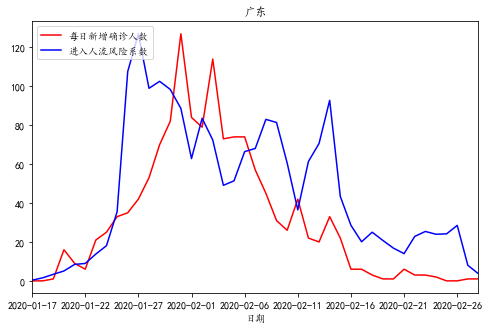

In [10]:
analyzer.plot_move_inc_corr('广东', '2020-02-28', n=3, shift=0, window=1, sample_cnt=sample_cnt)

corr: 0.7757149108397733


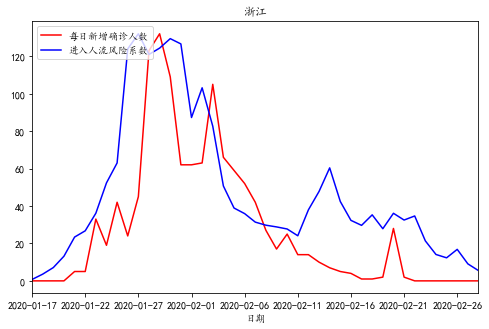

In [11]:
analyzer.plot_move_inc_corr('浙江', '2020-02-28', n=3, shift=0, window=1, sample_cnt=sample_cnt)

corr: 0.744133248475272


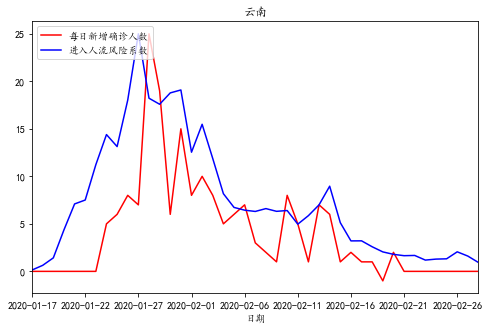

In [9]:
analyzer.plot_move_inc_corr('云南', '2020-02-28', n=3, shift=0, window=1, sample_cnt=sample_cnt)

corr: 0.7757149108397733


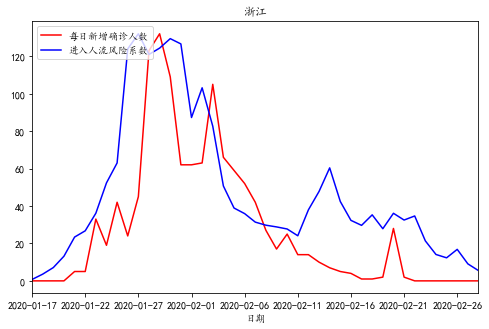

In [8]:
analyzer.plot_move_inc_corr('浙江', '2020-02-28', n=3, shift=0, window=1, sample_cnt=sample_cnt)

corr: 0.8001342083267263


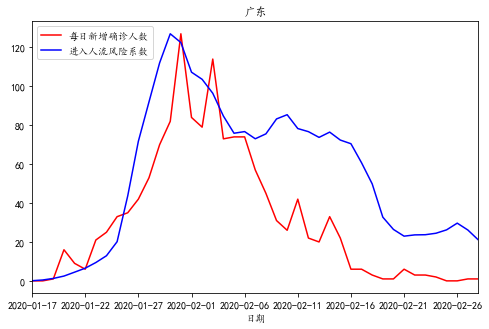

In [9]:
analyzer.plot_move_inc_corr('广东', '2020-02-28', n=3, sample_cnt=sample_cnt)

corr: 0.8696664819220528


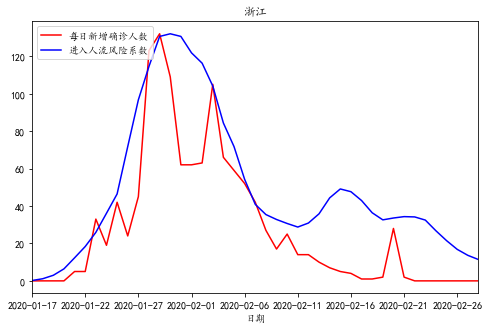

In [10]:
analyzer.plot_move_inc_corr('浙江', '2020-02-28', n=3, sample_cnt=sample_cnt)

corr: 0.8676205365511881


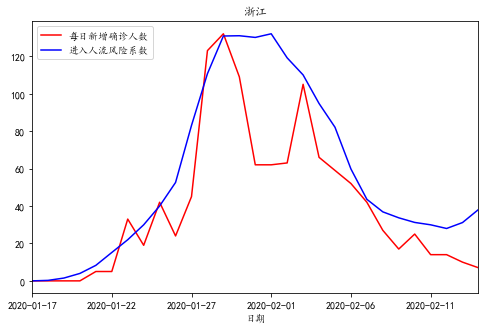

In [11]:
analyzer.plot_move_inc_corr('浙江', '2020-02-14', n=3, sample_cnt=sample_cnt)